# Intuitive and Visual Explanation on the differences between L1 and L2 regularization

The L1 and L2 regularization are widely used methods to control the model complexity and restrict over-fitting.
There are some interesting comparisons between the L1 and L2 regularization. 

## Why we need regularization?

Suppose there is an unclear relationship between Y and factors $x_1, x_2, ..., x_n$. Consider using linear regression as an example. 
Given a linear model to predict Y
$$
y \approx \hat{y} = a_0 + a_1 x_1 + \cdots + a_n x_n
$$

where $a_i$ are the estimated coefficients.

Note that
1. The observed Y has some random noise in it.
2. For observed Ys, the more variables we use, the more complex model we will build, and the better estimation we will have
smaller MSE) to approximate observed Ys, including **approximating Ys random noise part**.

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2
$$

Note that we need to restrict the model complexity, to **suppress the model's intention to approximate the random noise part**. One way is to put more control
on the value of the single coefficients. If the coefficient is restricted to a small number, its corresponding factor may have limited impact on the outcome (Y),
forcing the model to use othe factors to explain the variance of Y's.

We choose to avoid manipulating single coefficients, but to give a quota for all these coefficients, and give them more freedom and flexibility to pick up the most
influential factors, and to eliminate the least ones.

That is the intuition of regularization.

## L1 vs. L2

To practice the regularization, or to say, to define the quota to regulate the coefficients, we have L1, Lasso 
$$
\hat{a}^{\text{lasso}} = \argmin_{a} \Bigg( \sum_{i}^n (y_i - \hat{y_i})^2 + \alpha\sum_{i}^n |a_i| \Bigg)
$$

Where $\alpha$ is the strength of the regularization. A higher $\alpha$ has stronger restrictions on the coefficients.

and L2, Ridge method
$$
\hat{a}^{\text{ridge}} = \argmin_{a} \Bigg( \sum_{i}^n (y_i - \hat{y_i})^2 + \alpha\sum_{i}^n (a_i)^2 \Bigg)
$$


## Difference between L1 and L2

The difference in the definition of L1 and L2 is: L1 controls the first order summation, while L2 has restriction on the summation of the second order of coefficients.

## Example

First we generate data, which should have a relationship that models $y = \sin(x)$, but with some random noise term. Let's see how to use linear regression
to approximate the true relation, with the help of L1 and L2 regularization.

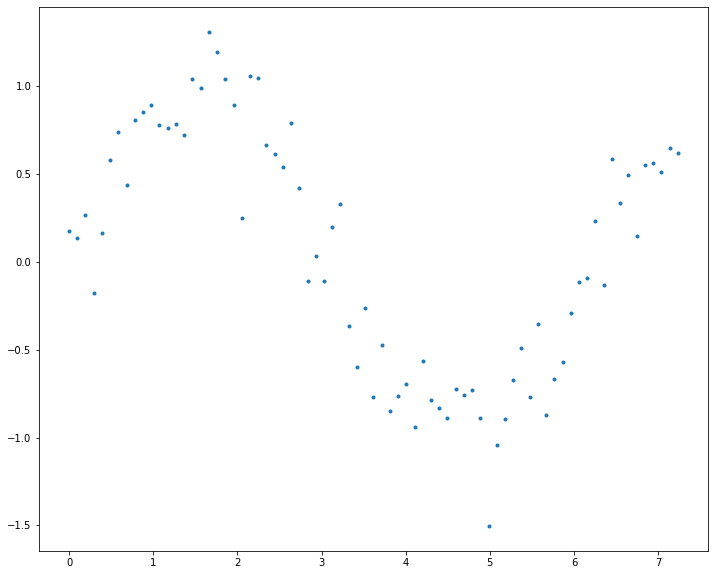

In [3]:
import numpy as np 
import pandas as pd 
import random 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

x = np.array([1.4*i*np.pi/180 for i in range(0,300,4)])
np.random.seed(20)  #random 

y = np.sin(x) + np.random.normal(0,0.2,len(x)) 
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')